# Motivation:
有時候被統計者在填寫問卷時，並不總是能以客觀的角度來填寫，尤其是對於較為敏感的事物。若能從其他特徵來預測敏感問題的填寫結果，不僅能獲得較穩定、豐富的問卷結果，也減少填寫時間。

# Objective:
* 預測咖啡館的分數(Regression)
1. 型別: float64
2. 區間: [0.0, 5.0]

# Features:
* 5454筆資料、float64型別、[0.0, 5.0]區間 
1. churches
2. resorts
3. beaches
4. parks
5. theatres
6. museums 
7. malls            
8. zoo              
9. restaurants       
10. pubs              
11. local_services    
12. pizza_shop        
13. hotel_lodgings    
14. juice_bars        
15. galleries         
16. dance_clubs       
17. pools             
18. gyms              
19. bakeries          
20. spas              
21. view_points       
22. monuments         
23. gardens 

# Models:
1. Ridge 
2. Lasso 
3. ElasticNet 
4. Kernel Ridge 
5. Gradient Boosting 
6. Xgboost
7. LGBM 

# Method:
1. average models predictions
2. Using concepts of Stacking Model and of Ensembling to reduce root-mean-squared-error

# Read dataset

In [1]:
import numpy as np 
import pandas as pd 

data = pd.read_csv("../input/data.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
User           5456 non-null object
Category 1     5456 non-null float64
Category 2     5456 non-null float64
Category 3     5456 non-null float64
Category 4     5456 non-null float64
Category 5     5456 non-null float64
Category 6     5456 non-null float64
Category 7     5456 non-null float64
Category 8     5456 non-null float64
Category 9     5456 non-null float64
Category 10    5456 non-null float64
Category 11    5456 non-null object
Category 12    5455 non-null float64
Category 13    5456 non-null float64
Category 14    5456 non-null float64
Category 15    5456 non-null float64
Category 16    5456 non-null float64
Category 17    5456 non-null float64
Category 18    5456 non-null float64
Category 19    5456 non-null float64
Category 20    5456 non-null float64
Category 21    5456 non-null float64
Category 22    5456 non-null float64
Category 23    5456 non-null float64
Categor

# Rename & Clean dataset 

In [2]:
df = data.drop(labels=['User', 'Unnamed: 25'], axis=1)

new_names = {'Category 1' : 'churches', 'Category 2' : 'resorts', 
            'Category 3' : 'beaches', 'Category 4' : 'parks',
            'Category 5' : 'theatres', 'Category 6' : 'museums',
            'Category 7' : 'malls', 'Category 8' : 'zoo',
            'Category 9' : 'restaurants', 'Category 10' : 'pubs',
            'Category 11' : 'local_services', 'Category 12' : 'pizza_shop',
            'Category 13' : 'hotel_lodgings', 'Category 14' : 'juice_bars',
            'Category 15' : 'galleries', 'Category 16' : 'dance_clubs',
            'Category 17' : 'pools', 'Category 18' : 'gyms',
            'Category 19' : 'bakeries', 'Category 20' : 'spas',
            'Category 21' : 'cafes', 'Category 22' : 'view_points',
            'Category 23' : 'monuments', 'Category 24' : 'gardens'}
df = df.rename(index=str, columns=new_names)


df['local_services'] = pd.to_numeric(df['local_services'], errors='coerce')

df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5454 entries, 0 to 5455
Data columns (total 24 columns):
churches          5454 non-null float64
resorts           5454 non-null float64
beaches           5454 non-null float64
parks             5454 non-null float64
theatres          5454 non-null float64
museums           5454 non-null float64
malls             5454 non-null float64
zoo               5454 non-null float64
restaurants       5454 non-null float64
pubs              5454 non-null float64
local_services    5454 non-null float64
pizza_shop        5454 non-null float64
hotel_lodgings    5454 non-null float64
juice_bars        5454 non-null float64
galleries         5454 non-null float64
dance_clubs       5454 non-null float64
pools             5454 non-null float64
gyms              5454 non-null float64
bakeries          5454 non-null float64
spas              5454 non-null float64
cafes             5454 non-null float64
view_points       5454 non-null float64
monuments         

In [3]:
df.head(5)

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs,local_services,pizza_shop,hotel_lodgings,juice_bars,galleries,dance_clubs,pools,gyms,bakeries,spas,cafes,view_points,monuments,gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


# Import plotting library

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

sns.set_style('darkgrid')

# Heatmap between features

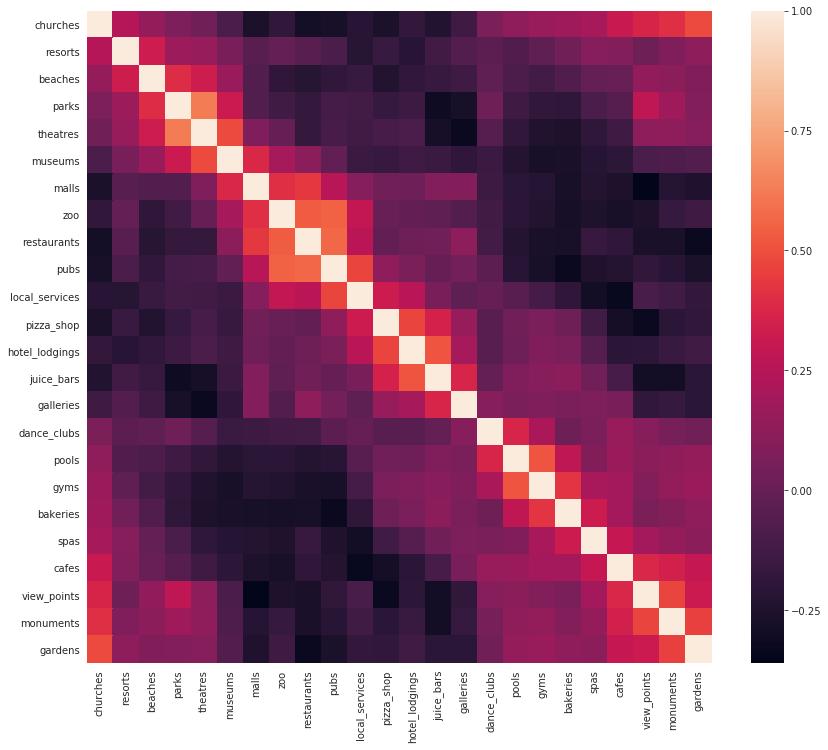

In [5]:
#sns.pairplot(df,  diag_kind="kde")

_ , ax = plt.subplots(figsize =(14, 12))
sns.heatmap(df.corr(), ax=ax)

# Boxplot for features

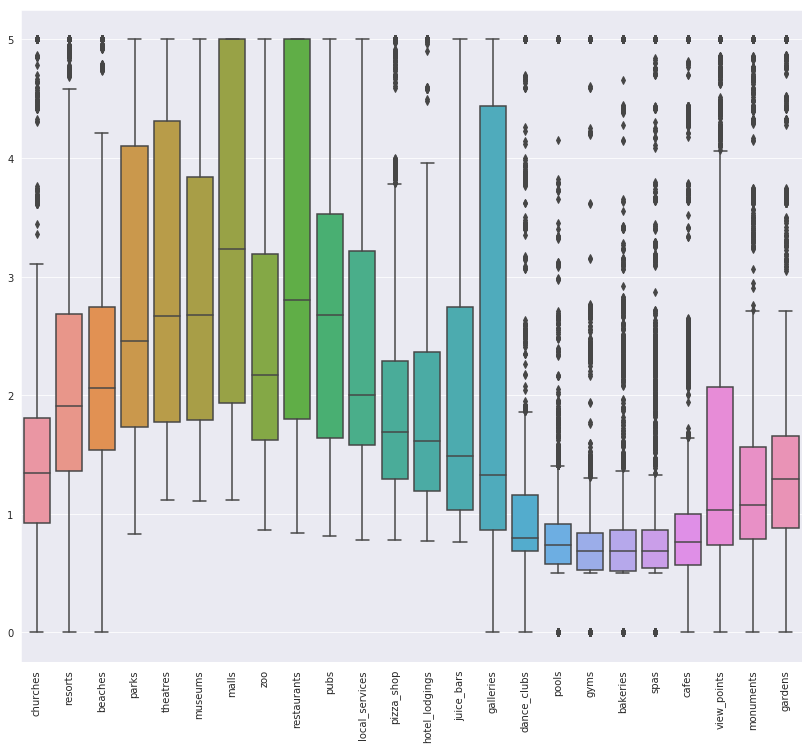

In [6]:
_ , ax = plt.subplots(figsize =(14, 12))
g = sns.boxplot(data=df, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g

# Define target

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

target = 'cafes'

# Distplot for target

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


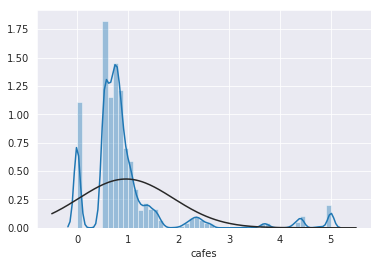

In [8]:
from scipy import stats
from scipy.stats import norm, skew 

sns.distplot(df[target] , fit=norm)

#### 可發現分布不太均勻，需要讓它更接近常態分佈

# Use log(1+X) to change value of target

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


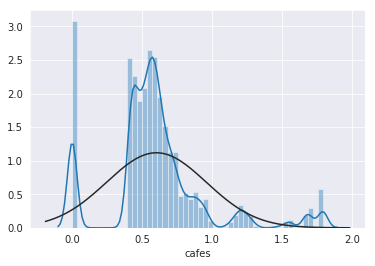

In [9]:
df[target] = np.log1p(df[target])

sns.distplot(df[target] , fit=norm)

#### 資料接近常態分布會使model有更好的預測結果，最後輸出則用exp(X)-1還原資料值

# Boxcox Transformation for features 
#### Box-Cox變換是統計建模中常用的一種數據變換，它使得數據符合常態分布(skew更接近0)

In [10]:
features = [feature for feature in df.columns if feature != target]

from scipy.special import boxcox1p

lam = 0.15
for feat in features:
    print('Before', feat, ' skew:', skew(df[feat]))
    df[feat] = boxcox1p(df[feat], lam)
    print('After', feat, ' skew:', skew(df[feat]))
    print('-'*10)

Before churches  skew: 1.665888332995304
After churches  skew: 0.2959582433107996
----------
Before resorts  skew: 0.8828814586633137
After resorts  skew: 0.2785311812164691
----------
Before beaches  skew: 1.0850276766002547
After beaches  skew: 0.7228596086898136
----------
Before parks  skew: 0.7066218202140944
After parks  skew: 0.4589822750591366
----------
Before theatres  skew: 0.4872811933474206
After theatres  skew: 0.25340295160001125
----------
Before museums  skew: 0.5583865823958045
After museums  skew: 0.2875651607728443
----------
Before malls  skew: 0.01765294294563769
After malls  skew: -0.1831130102437476
----------
Before zoo  skew: 0.7722868165872913
After zoo  skew: 0.3961231680135305
----------
Before restaurants  skew: 0.2728359653149922
After restaurants  skew: 0.005634102126424003
----------
Before pubs  skew: 0.5239040806697667
After pubs  skew: 0.14760372193595392
----------
Before local_services  skew: 0.8168843866122687
After local_services  skew: 0.4694401

# Training & Testing data

In [11]:
X = df.iloc[:,df.columns != target]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

# Import models library & many tools

In [12]:
from sklearn.linear_model import Ridge, ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

# Use cross-validation to calculate RMSE of model

In [13]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# Ridge model & Tune parameters

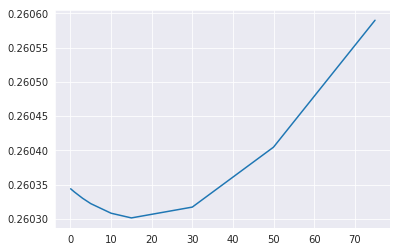

In [14]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

rgs = [rmsle_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

rgs = pd.Series(rgs, index = alphas)
rgs.plot()

In [15]:
ridge = Ridge(alpha = 15)

print('ridge score:', rmsle_cv(ridge).mean())

ridge score: 0.26030152293125575


# Lasso model & Tune parameters

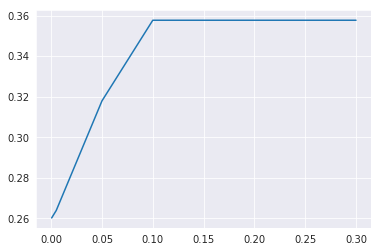

In [16]:
alphas = [0.0005, 0.005, 0.05, 0.1, 0.3]

rgs = [rmsle_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]

rgs = pd.Series(rgs, index = alphas)
rgs.plot()

In [17]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

print('lasso score:', rmsle_cv(lasso).mean())

lasso score: 0.2602979196576835


# ElasticNet model & Tune parameters

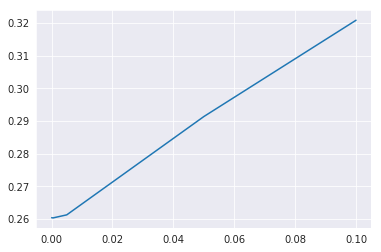

In [18]:
alphas = [0.00005, 0.0005, 0.005, 0.05, 0.1]

rgs = [rmsle_cv(ElasticNet(alpha = alpha)).mean() for alpha in alphas]

rgs = pd.Series(rgs, index = alphas)
rgs.plot()

In [19]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00005, random_state=3))

print('ElasticNet score:', rmsle_cv(ENet).mean())

ElasticNet score: 0.26034044070660817


# KernelRidge model & Tune parameters

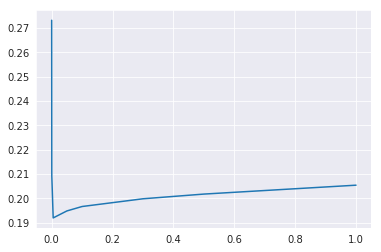

In [20]:
alphas = [0.00005, 0.0005, 0.005, 0.05, 0.1, 0.3, 0.5, 1]

rgs = [rmsle_cv(KernelRidge(alpha = alpha, kernel='polynomial', degree=3)).mean() for alpha in alphas]

rgs = pd.Series(rgs, index = alphas)
rgs.plot()

In [21]:
KRR = KernelRidge(alpha=0.05, kernel='polynomial', degree=3)

print("Kernel Ridge score:", rmsle_cv(KRR).mean())

Kernel Ridge score: 0.19475459912369858


# GBoost model & Tune parameters

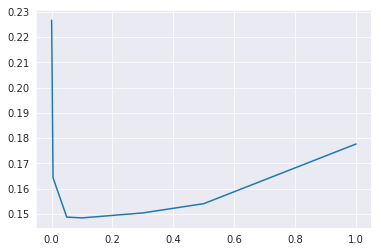

In [22]:
alphas = [0.0005, 0.005, 0.05, 0.1, 0.3, 0.5, 1]

rgs = [rmsle_cv(GradientBoostingRegressor(n_estimators=3000, learning_rate=alpha,
                                   max_depth=4, max_features='sqrt',
                                   random_state =5)).mean() for alpha in alphas]

rgs = pd.Series(rgs, index = alphas)
rgs.plot()

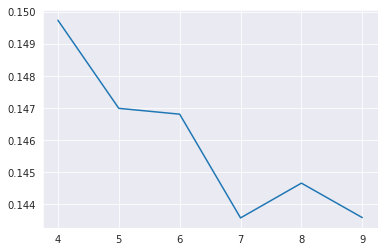

In [23]:
alphas = [4, 5, 6, 7, 8, 9]

rgs = [rmsle_cv(GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=alpha, max_features='sqrt',
                                   random_state =5)).mean() for alpha in alphas]

rgs = pd.Series(rgs, index = alphas)
rgs.plot()

In [24]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=9, max_features='sqrt',      
                                   random_state =5)

print("Gradient Boosting score:", rmsle_cv(GBoost).mean())

Gradient Boosting score: 0.14358770189536613


# XGB model & Tune parameters

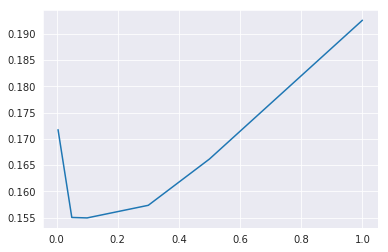

In [25]:
alphas = [0.005, 0.05, 0.1, 0.3, 0.5, 1]

rgs = [rmsle_cv(xgb.XGBRegressor(colsample_bytree=0.4603, 
                             learning_rate=alpha, max_depth=3, 
                             n_estimators=2200,
                             random_state =7)).mean() for alpha in alphas]

rgs = pd.Series(rgs, index = alphas)
rgs.plot()

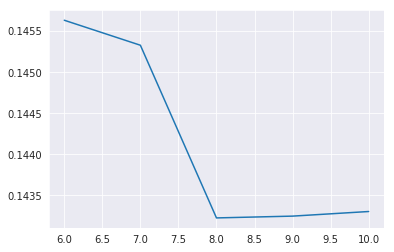

In [26]:
alphas = [6, 7, 8, 9, 10]

rgs = [rmsle_cv(xgb.XGBRegressor(colsample_bytree=0.4603,
                             learning_rate=0.05, max_depth=alpha, 
                             n_estimators=2200,
                             random_state =7)).mean() for alpha in alphas]

rgs = pd.Series(rgs, index = alphas)
rgs.plot()

In [27]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, 
                             learning_rate=0.05, max_depth=8, 
                             n_estimators=2200,
                             random_state =7)

print("Xgboost score:", rmsle_cv(model_xgb).mean())

Xgboost score: 0.14322548387294834


# LGBM model & Tune parameters

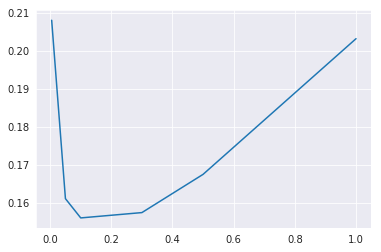

In [28]:
alphas = [0.005, 0.05, 0.1, 0.3, 0.5, 1]

rgs = [rmsle_cv(lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=alpha, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)).mean() for alpha in alphas]

rgs = pd.Series(rgs, index = alphas)
rgs.plot()

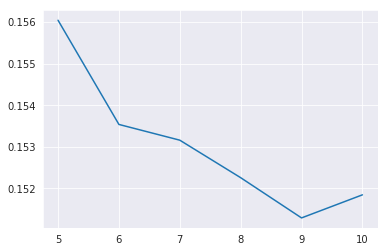

In [29]:
alphas = [5, 6, 7, 8, 9, 10]

rgs = [rmsle_cv(lgb.LGBMRegressor(objective='regression',num_leaves=alpha,
                              learning_rate=0.1, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)).mean() for alpha in alphas]

rgs = pd.Series(rgs, index = alphas)
rgs.plot()

In [30]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=9,
                              learning_rate=0.1, n_estimators=500
                              )

print("LGBM score:", rmsle_cv(model_lgb).mean())

LGBM score: 0.15168132457451483


# Score of models

In [31]:
print('Ridge score:', rmsle_cv(ridge).mean())
print('Lasso score:', rmsle_cv(lasso).mean())
print('ElasticNet score:', rmsle_cv(ENet).mean())
print("Kernel Ridge score:", rmsle_cv(KRR).mean())
print("Gradient Boosting score:", rmsle_cv(GBoost).mean())
print("Xgboost score:", rmsle_cv(model_xgb).mean())
print("LGBM score:", rmsle_cv(model_lgb).mean())

Ridge score: 0.26030152293125575
Lasso score: 0.2602979196576835
ElasticNet score: 0.26034044070660817
Kernel Ridge score: 0.1947545991237843
Gradient Boosting score: 0.14358770189536613
Xgboost score: 0.14322548387294834
LGBM score: 0.15168132457451483


# Method 1: average models

In [32]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):        
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        
        return np.mean(predictions, axis=1) 

In [33]:
averaged_models = AveragingModels(models = (model_xgb, model_lgb))

score = rmsle_cv(averaged_models)
print(" Averaged base models score:", score.mean())

 Averaged base models score: 0.14391571275722043


# Method 2: Stack models

* Two layers & cross-validation(only use training data)
* Fist layer: train Ridge, ENet, KRR, GBoost models to predict value of target(cafe rating)
* Second layer: using predictions of first layer to train Lasso model

In [34]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [35]:
stacked_averaged_models = StackingAveragedModels(base_models = (ridge, ENet, KRR, GBoost),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score:", score.mean())

Stacking Averaged models score: 0.1416774476401142


# Ensembling(stacking model + LGB + XGB)
#### Finally, use it to calculate rmse of test data

In [36]:
stacked_averaged_models.fit(X_train, y_train)
model_lgb.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

predict_sum = stacked_averaged_models.predict(X_test) + model_lgb.predict(X_test) + model_xgb.predict(X_test)

predict_sum = predict_sum / 3

print('rmse:', np.sqrt(mean_squared_error(predict_sum, y_test)))

rmse: 0.10869827821309254


# Results Output 

In [37]:
results = pd.DataFrame({'cafe_predicted_rating':np.expm1(predict_sum)})
results.to_csv("StackingSubmission.csv", index=False)
results.head(5)

,cafe_predicted_rating
0,1.296569
1,0.976949
2,0.631463
3,3.632972
4,0.971030
